Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 - 6s - 13ms/step - accuracy: 0.9013 - loss: 0.3211 - val_accuracy: 0.9823 - val_loss: 0.0631
Epoch 2/10
422/422 - 5s - 12ms/step - accuracy: 0.9688 - loss: 0.1041 - val_accuracy: 0.9872 - val_loss: 0.0473
Epoch 3/10
422/422 - 5s - 13ms/step - accuracy: 0.9768 - loss: 0.0791 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 4/10
422/422 - 5s - 12ms/step - accuracy: 0.9810 - loss: 0.0628 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 5/10
422/422 - 5s - 12ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9905 - val_loss: 0.0321
Epoch 6/10
422/422 - 5s - 13ms/step - accuracy: 0.9863 - loss: 0.0461 - val_accuracy: 0.9908 - val_loss: 0.0329
Epoch 7/10
422/422 - 5s - 13ms/step - accuracy: 0.9878 - loss: 0.0411 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 8/10
422/422 - 5s - 13ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9930 - val_loss: 0.0313
Epoch 9/10
422/422 - 5s - 13ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9915 - val_loss:

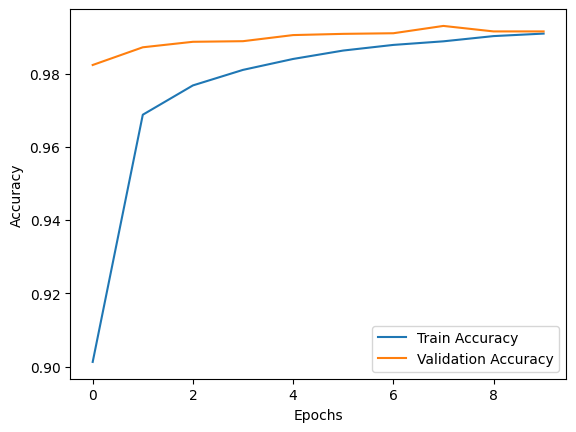

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# --------------------------
# 1. Load and preprocess data
# --------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize (0-1 range)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------
# 2. Build CNN model
# --------------------------
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # 10 classes
])

model.summary()

# --------------------------
# 3. Compile the model
# --------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --------------------------
# 4. Train the model
# --------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# --------------------------
# 5. Evaluate on test set
# --------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# --------------------------
# 6. Plot training history
# --------------------------
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
